 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gibsonlab/mdsine2_tutorials/blob/main/notebooks/tut_01b_viz.ipynb)
 # Visualizing the data

In this tutorial, we'll use pandas and matplotlib to inspect the raw data without using MDSINE2. 

Note that MDSINE2 contains it's own visualization tools, but the purpose of this tutorial is to understand preliminary dataprocessing so we use only pandas and matplotlib.

The input to MDSINE2 consists of five tab-delimited files:

|File description|Local file name|
|---|---|
| 1. list of the sequence and taxonomic label for each taxa | `rdp_species.tsv` |
| 2. table of counts for each taxa in each sample | `counts.tsv`
| 3. table specifying the time points at which each sample was collected for each subject | `metadata.tsv`
| 4. table of qPCR values for each sample | `qpcr.tsv`
| 5. table of perturbation names, start times, end times, and associated subjects that received the perturbation | `perturbations.tsv`



In [136]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Get data
    !curl -LJO https://github.com/gibsonlab/mdsine2_tutorials/raw/main/data/replicates-toy.zip
    !curl -LJO https://github.com/gibsonlab/mdsine2_tutorials/raw/main/data/healthy-toy.zip
    
    !mkdir -p ./data/
    !unzip -o healthy-toy.zip -d ./data/ && unzip -o replicates-toy.zip -d ./data/

else:
    !cd ..

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3265  100  3265    0     0  10919      0 --:--:-- --:--:-- --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22392  100 22392    0     0  74392      0 --:--:-- --:--:-- --:--:-- 74392
Archive:  healthy-toy.zip
  inflating: ./data/healthy-toy/perturbations.tsv  
  inflating: ./data/healthy-toy/qpcr.tsv  
  inflating: ./data/healthy-toy/metadata.tsv  
  inflating: ./data/healthy-toy/counts.tsv  
  inflating: ./data/healthy-toy/rdp_species.tsv  
Archive:  replicates-toy.zip
  inflating: ./data/replicates-toy/perturbations.tsv  
  inflating: ./data/r

In [137]:
from pathlib import Path
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd


 # Loading data
 Here we load a small preprocessed "toy" dataset created in the previous tutorial.

In [138]:
# Specify data input and output paths
data_dir = Path('./data/')
replicates_dir = data_dir / 'replicates-toy'
healthy_dir = data_dir / 'healthy-toy'

output_dir = Path('./output/')
fig_dir = Path('./figs/')

output_dir.mkdir(exist_ok=True, parents=True)
fig_dir.mkdir(exist_ok=True, parents=True)



In [139]:
# Read data for the healthy cohort
# This line finds all tsv files in the specified directory.
tsv_files = sorted(healthy_dir.glob('*.tsv'))

# This line creates an easily-indexable dictionary of the file names.
# For example, tsv_files['counts'] stores the path to the `counts file. 
tsv_files = {f.stem : f for f in tsv_files}

for key in tsv_files.keys():
    print(f"Found file {tsv_files[key]}")

Found file data/healthy-toy/counts.tsv
Found file data/healthy-toy/metadata.tsv
Found file data/healthy-toy/perturbations.tsv
Found file data/healthy-toy/qpcr.tsv
Found file data/healthy-toy/rdp_species.tsv


In [140]:
# Let's look at the `counts.tsv` file specifically.
counts = pd.read_csv(tsv_files['counts'], index_col=0, sep='\t')
counts.head(n = 10)

,2-D0AM,2-D0PM,2-D10,2-D11,2-D14,2-D16,2-D18,2-D1AM,2-D1PM,2-D21AM,...,5-D60AM,5-D60PM,5-D61,5-D62,5-D63,5-D64AM,5-D64PM,5-D7,5-D8,5-D9
name,,,,,,,,,,,,,,,,,,,,,
ASV_1,1099,3299,1112,1637,7887,9432,3124,1742,195,3446,...,218,409,2072,1160,723,1043,1732,4008,2924,3879
ASV_2,180,826,135,106,235,426,546,1338,4577,253,...,2282,3729,6898,4491,4880,5940,7070,420,307,1267
ASV_3,10,7,88,81,97,113,0,10,23,0,...,5,45,28,0,0,0,0,0,0,101
ASV_4,3,0,3793,2713,2683,3423,5351,9,32,3815,...,8539,12437,15397,6717,4179,3597,5020,1334,895,2242
ASV_5,6,13,8074,4830,9646,5663,11136,194,514,8566,...,2,6,2011,2944,9708,1664,2578,8503,3163,6059
ASV_6,0,0,5852,3034,6870,6102,9957,2,7,4626,...,1855,3481,5015,3096,2779,3302,1941,4714,2275,1903
ASV_7,67,173,106,59,138,286,417,814,2375,190,...,1201,2013,3662,2440,2729,3361,3894,266,250,840
ASV_8,44,49,17121,6722,16792,29142,35796,711,2686,15420,...,0,0,0,0,0,0,0,13574,5638,5432
ASV_9,178,726,35,27,21,52,59,0,20,0,...,0,4,0,0,0,0,0,6,0,0


In [141]:
# Let's also look at the species flie, `rdp_species.tsv`. Note, the index
# of `counts.tsv` and `rdp_species.tsv` match.
rdp = pd.read_csv(tsv_files['rdp_species'], index_col=0, sep='\t')
rdp = rdp.fillna('unspecified')
rdp.head(n = 10)

,sequence,kingdom,phylum,class,order,family,genus,species
name,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,unspecified
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis
ASV_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,unspecified
ASV_6,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Parasutterella,excrementihominis
ASV_7,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_8,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_9,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,dorei/fragilis


In [142]:
# Let's also load the metadata and perturbation data. Note, the columns in 
# `counts.tsv` are the same as the index in metadata.

metadata = pd.read_csv(tsv_files['metadata'], index_col = 0, sep='\t')
perturbations = pd.read_csv(tsv_files['perturbations'], index_col = 0, sep='\t')

metadata

,subject,time
sampleID,,
2-D0AM,2,0.0
2-D0PM,2,0.5
2-D10,2,10.0
2-D11,2,11.0
2-D14,2,14.0
...,...,...
5-D64AM,5,64.0
5-D64PM,5,64.5
5-D7,5,7.0


In [143]:
# The read depth varies across each sample. Let's convert our counts table to 
# relative abundance by dividing each column by it's ead depth.

read_depth = counts.sum(axis=0)
rel_abund = counts / read_depth
print('Check: all columns of rel_abund sum to 1?', np.isclose(rel_abund.sum(axis=0), 1).all())

Check: all columns of rel_abund sum to 1? True


In [144]:
# Let's plot the data for one subject as a stacked bar chart.
# To do this, we'll need to extract data for the subject from the 
# rel_abund dataframe, and then make sure it's in the right temporal order.
subj_ID = 2
subj_cols = [x for x in rel_abund.columns if x.startswith(f'{subj_ID}-')]

def sort_function(x):
    x = x.split('-D')[1]
    x = x.replace('AM', '.0').replace('PM', '.1')
    return float(x)

subj_cols = sorted(subj_cols, key=sort_function)

# To test that our sorting makes sense, we can view the temporal metadata, 
# or check that time is stricly ascending.
print('Check: samples ordered correctly?:', np.all(np.diff(metadata.loc[subj_cols]['time']) > 0))

Check: samples ordered correctly?: True


(-0.75, 76.75, 0.0, 1.05)

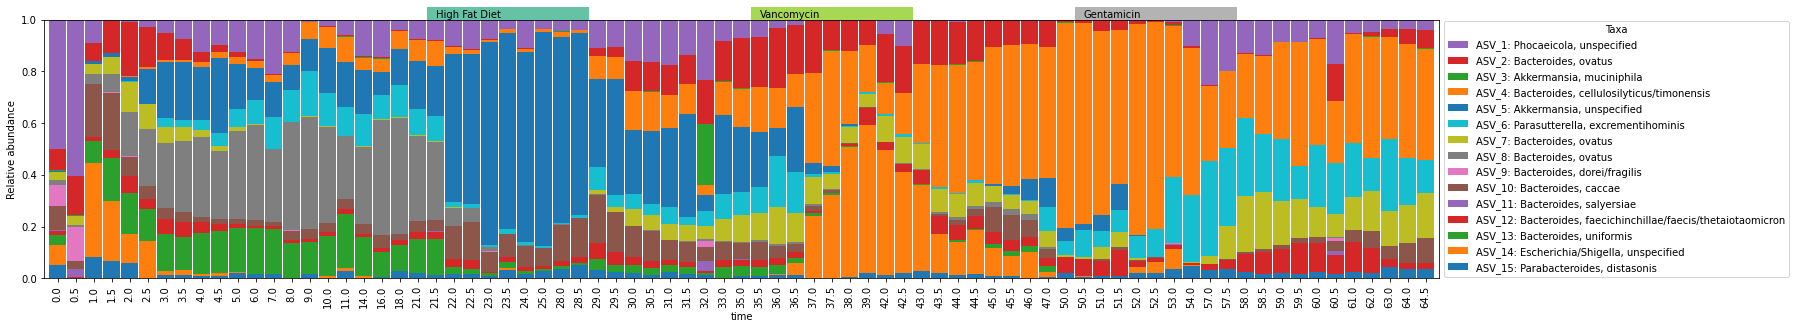

In [145]:
# Now we'll plot the data. First we use the sorted column names from above
# to extract data for our subject, then we use matplotlib and pandas 
# to plot.
rel_abund_subj = rel_abund[subj_cols]

fig, ax = plt.subplots(2, 1, sharex=True,
                       gridspec_kw={'hspace': 0.0, 'wspace': 0.0, 
                                    'height_ratios' : [1,20]})

# The index [::-1] just reverses the order of the dataframe. We only do this 
# so that the most abundant taxa are at the top of the plot. Note, we also 
# reverse the ordering in the legend below. We also add the time data from
# the metadata file to the x axis.
rel_abund_subj_plot = rel_abund_subj[::-1].T
rel_abund_subj_plot['time'] = metadata.loc[subj_cols]['time']

rel_abund_subj_plot.plot.bar(
    x='time',
    width=0.9,
    figsize=(25,5),
    ax=ax[1],
    stacked=True,
    legend=True,
    )

ax[1].set_ylabel('Relative abundance')

# We'll also update the legend so that it displays <ASV>: <genus>, <species> 
# data for each ASV.

handles, labels = ax[1].get_legend_handles_labels()

rdp['legend_tag'] = rdp.index + ': ' + \
    rdp['genus'] + ', ' + rdp['species']

legend_tags = list(rdp.loc[labels[::-1]]['legend_tag'])

ax[1].legend(
    handles = handles[::-1],
    labels = legend_tags,
    loc='center left',
    bbox_to_anchor=(1., 0.5),
    title='Taxa',
    )

ax[1].set_ylim([0,1])

# We can also use the perturbation dataset to highlight the times 
# where perturbations were applied.
perturb_subj = perturbations[perturbations['subject'] == subj_ID]

df = pd.DataFrame(columns=list(perturb_subj.index) + ['time'])
df['time'] = metadata.loc[subj_cols]['time']
df['idx'] = range(df.shape[0])

for pert_name in perturb_subj.index:
    df[pert_name] = None
    start = perturb_subj.loc[pert_name]['start']
    end = perturb_subj.loc[pert_name]['end']
    index = np.logical_and(df['time'] >= start, df['time'] <= end)
    df.loc[index, pert_name] = 1 
    ax[0].annotate(pert_name, (df['idx'][df['time'] == start], 0.2))

df.plot.bar(
    x='time',
    y=perturb_subj.index,
    width=1.0,
    colormap='Set2',
    ax=ax[0],
    stacked=True,
    legend=False,
    )

ax[0].axis('off')